In [1]:
seed = 1234
results_action = 'load'# simulate, simulate_and_save or load

## Imports

In [2]:
import numpy as np
from rl.environments import GridWorld, episode_length_distribution
from rl.plotting import plot_grid_world, plot_heatmap, plot_comparison, plot_parallel_comparison, plot_best_param_comparison, plot_best_and_div_alpha__comparison, plot_parallel_comparison, plot_best_alpha_comparison, plot_best_comparison, plot_grid_world_with_policy, plot_grid_world_optimal_policy
from rl.algorithms import nstepTD_rec, λreturn_rec, TTDλ, TDλ, ETλ, nstepSARSA_rec, SARSAλ, SARSA_ETλ, comparison
from rl.value_functions import StateValueFunction, ActionValueFunction
from utils.results import save_results, load_results, flt
legend_best = {'borderaxespad': 0., 'frameon': False}
legend_top = {'bbox_to_anchor': (0., 1.02, 2., .102), 'loc': 'lower left', 'ncol': 5, 'mode':'expand', 'borderaxespad': 0.}
legend_top1 = {'bbox_to_anchor': (0., 1.02, 1., .102), 'loc': 'lower left', 'ncol': 5, 'mode':'expand', 'borderaxespad': 0.}
legend_top_2col = {'bbox_to_anchor': (0., 1.02, 1., .102), 'loc': 'lower left', 'ncol': 2, 'mode':'expand', 'borderaxespad': 0.}
legend_top_3col = {'bbox_to_anchor': (0., 1.02, 1., .102), 'loc': 'lower left', 'ncol': 3, 'mode':'expand', 'borderaxespad': 0.}
legend_top_6col = {'bbox_to_anchor': (0., 1.02, 1., .102), 'loc': 'lower left', 'ncol': 6, 'mode':'expand', 'borderaxespad': 0.}

## Environment

In [3]:
env_name = 'GridWorld'
results_path = f'results/{env_name}/rmse'
results_c_path = f'results/{env_name}/return'
environment = GridWorld
env_n = 8
aggr_groups = None
gamma = 1.0

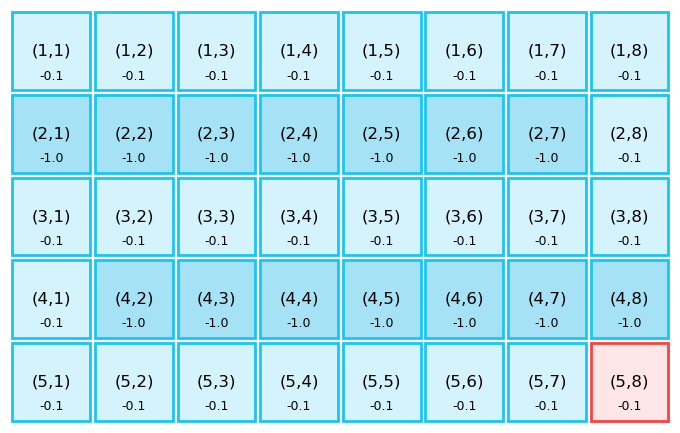

In [4]:
plot_grid_world(environment(env_n), save_file=f'results/{env_name}/plots/{env_name}_env')

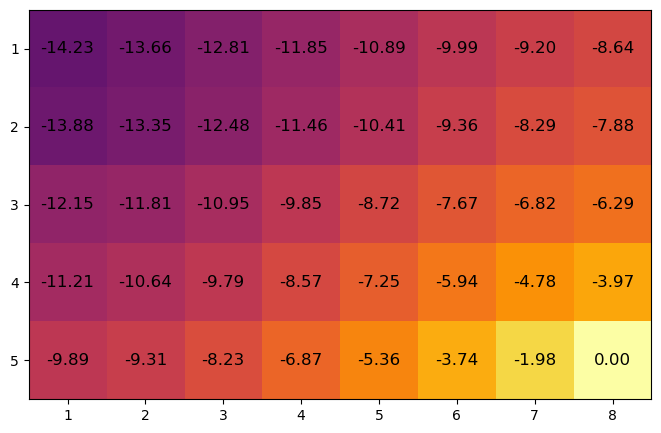

In [5]:
plot_heatmap(environment(env_n).calculate_value_function(gamma),None,labels_color='0.0',labels_size=12,vmin=-20.0,vmax=0.0, xticks=[f"{x}" for x in np.arange(1,env_n+1)], yticks=[f"{y}" for y in np.arange(1,6)], save_file=f'results/{env_name}/plots/{env_name}_v')

In [6]:
# plot_heatmap(environment(env_n).reward,None,labels_color='0.9',labels_size=12,cmap = 'gray',vmin=-1.0,vmax=2.0, xticks=[f"{x}" for x in np.arange(1,env_n+1)], yticks=[f"{y}" for y in np.arange(1,6)], save_file=f'results/{env_name}/plots/{env_name}_r')

In [7]:
environment(env_n, step_reward=1.0, bad_step_reward=1.0).calculate_value_function(gamma)[0,0]

34.30566466829349

In [8]:
%%time
l = episode_length_distribution(1000, environment, env_n, seed)

CPU times: user 511 ms, sys: 12.4 ms, total: 523 ms
Wall time: 589 ms


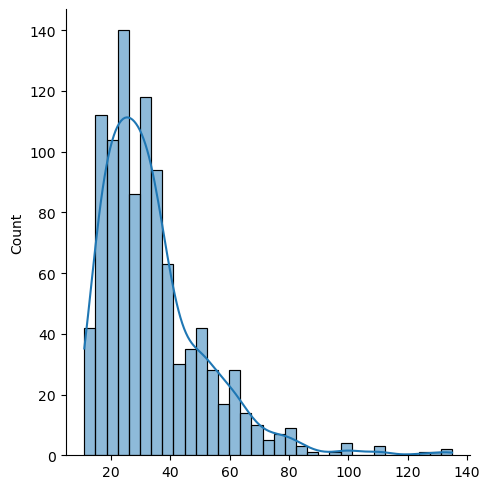

In [9]:
import seaborn as sns
sns.displot(l, kde=True)

## Results

### Evaluation

In [10]:
algorithms = ['n-step TD', 'λ-return alg.', 'TTD(λ)', 'accumulate TD(λ)', 'replace TD(λ)', 'true online TD(λ)', 'accumulate ET(λ)', 'replace ET(λ)', 'true online ET(λ)']
alg_colors = {algorithm_name: col for algorithm_name,col in zip(algorithms,['tab:green','black', 'tab:pink','goldenrod','orangered','tab:red','tab:cyan','tab:blue','tab:purple'])}
results = {algorithm_name: {'online': None, 'single-update': None} for algorithm_name in algorithms}

In [11]:
value_function = StateValueFunction
to_return = 'rmse_ep'
runs = 100
episodes = 50
operation = 'mean'
last = None
first = 30
skip_first = True

#### Variables

In [12]:
initial_value = 0.0
alpha_strategy = 'fixed'
# alpha_values = np.linspace(0.0, 1.0, 26)
alpha_values = np.append(np.linspace(0, 0.2, 20, endpoint=False),np.linspace(0.2, 1.0, 41))
beta = None
n_values = np.array([1,2,4,8,16,32,48,64,96,128])
lambda_values = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.82,0.84,0.86,0.88,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0])
# lambda_values = np.array([0.0,0.2,0.4,0.6,0.8,0.9,0.95,0.975,0.99,1.0])
lines_filter = {
    'n': [True]*len(n_values),
    'λ': [True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,True]
}
processes = None
show_progress_bar = True
bar_desc = None
leave_bar = False
ylim = (3.0,10.0)

#### n-step TD

In [13]:
algorithm_name = 'n-step TD'
algorithm_function = nstepTD_rec
variable = 'n'

In [14]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(n_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, n_values, env_n, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [15]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(n_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, n_values, env_n, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

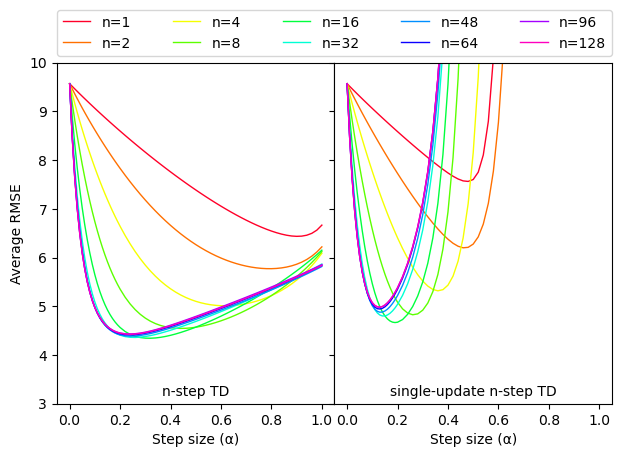

In [16]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, n_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top, save_file=f'results/{env_name}/plots/{env_name}_nstep')

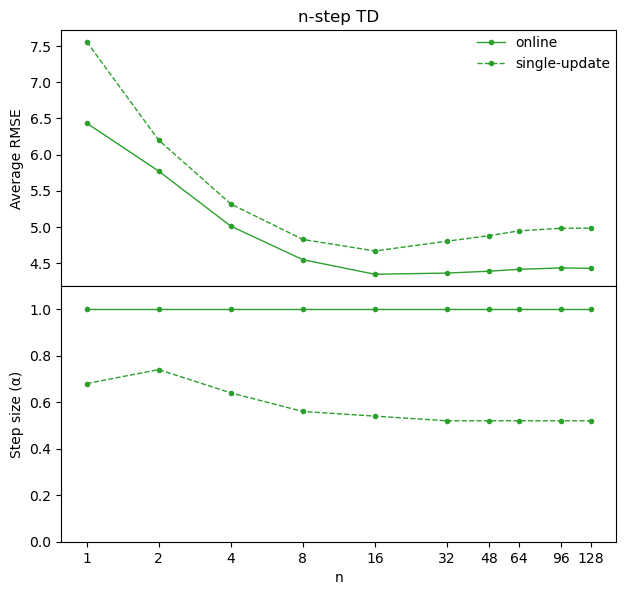

In [17]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], n_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', marker='.', legend_kwargs=legend_best, save_file=f'results/{env_name}/plots/{env_name}_nstep_c')

#### λ-return alg.

In [18]:
algorithm_name = 'λ-return alg.'
algorithm_function = λreturn_rec
variable = 'λ'

In [19]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [20]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

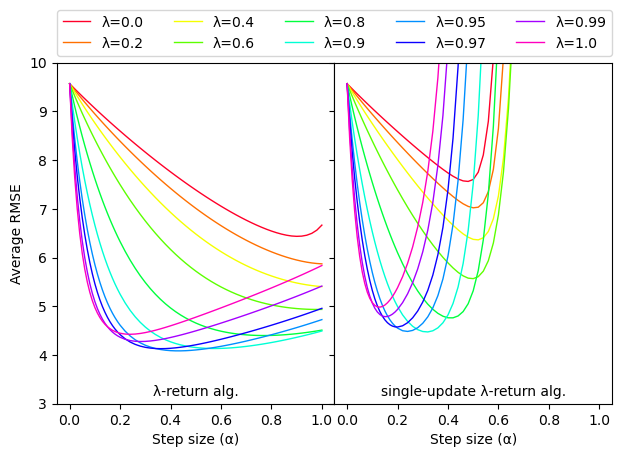

In [21]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

/notebooks/rl/plotting.py:148: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].plot(x_values, np.min(rmse, axis=1), marker, label=label, color=colors[i][0], linestyle =colors[i][1], linewidth=1.0) if colors else ax[0].plot(x_values, np.min(rmse, axis=1), marker, linestyle ='solid', label=label, linewidth=1.0)
/notebooks/rl/plotting.py:159: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax[1].plot(x_values, alpha_values[indexes], marker, label=label, color=colors[i][0], linestyle =colors[i][1], linewidth=1.0) if colors else ax[1].plot(x_values, alpha_values[indexes], marker, linestyle ='solid', label=label, linewidth=1.0)


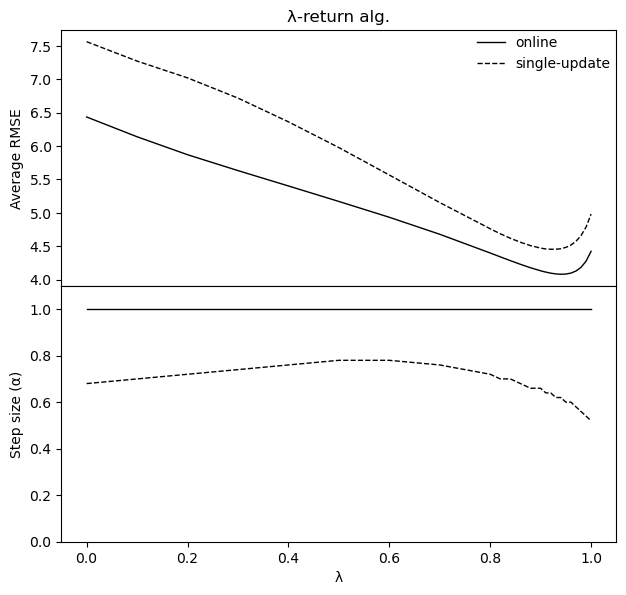

In [22]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### TTD(λ)

In [23]:
algorithm_name = 'TTD(λ)'
algorithm_function = TTDλ
variable = 'λ'
eta = 0.01

In [24]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}_{eta}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, eta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [25]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}_{eta}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, eta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

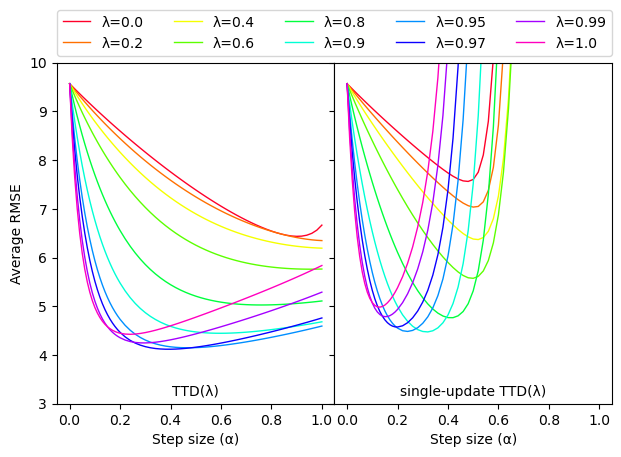

In [26]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

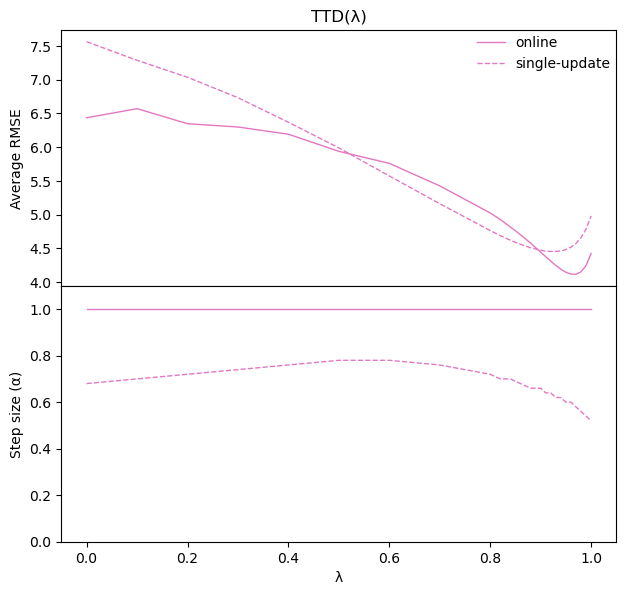

In [27]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### accumulate TD(λ)

In [28]:
algorithm_name = 'accumulate TD(λ)'
algorithm_function = TDλ
algorithm_type = 'accumulate'
variable = 'λ'

In [29]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [30]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

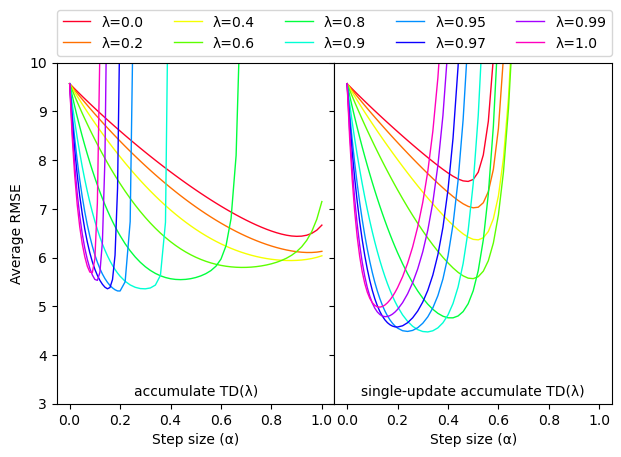

In [31]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

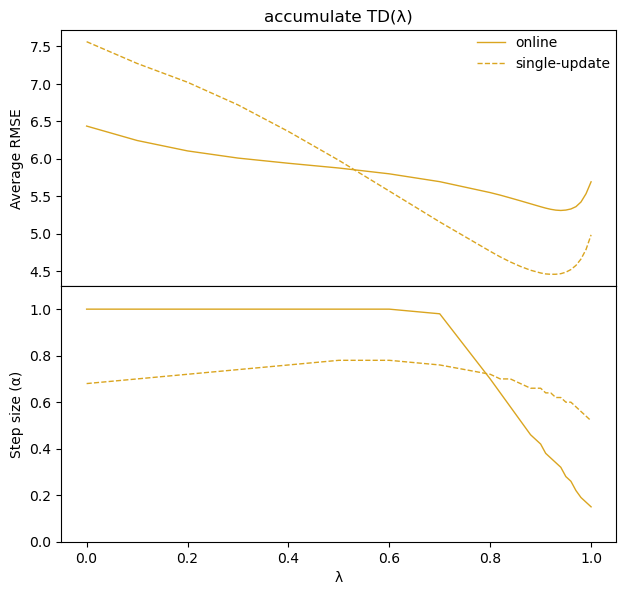

In [32]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### replace TD(λ)

In [33]:
algorithm_name = 'replace TD(λ)'
algorithm_function = TDλ
algorithm_type = 'replace'
variable = 'λ'

In [34]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [35]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

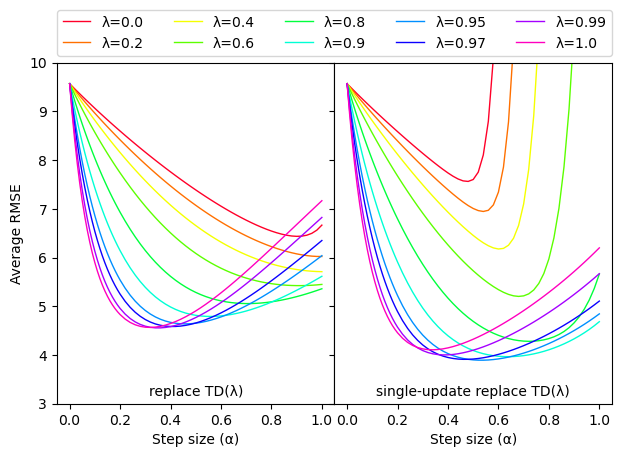

In [36]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

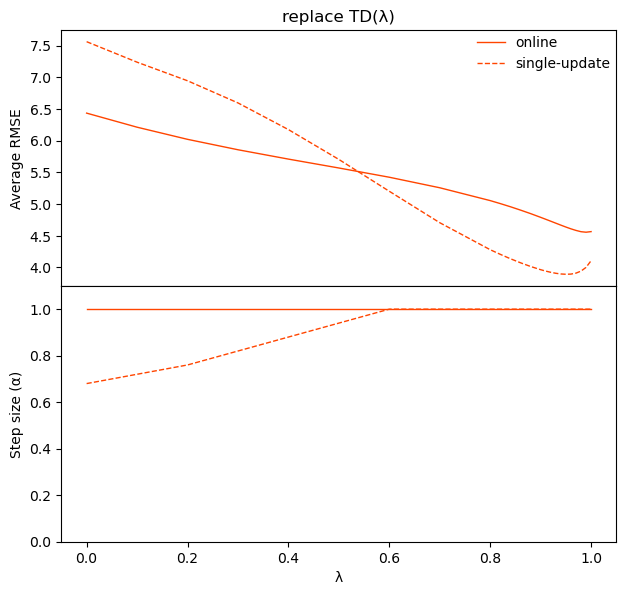

In [37]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### true online TD(λ)

In [38]:
algorithm_name = 'true online TD(λ)'
algorithm_function = TDλ
algorithm_type = 'true_online'
variable = 'λ'

In [39]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [40]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

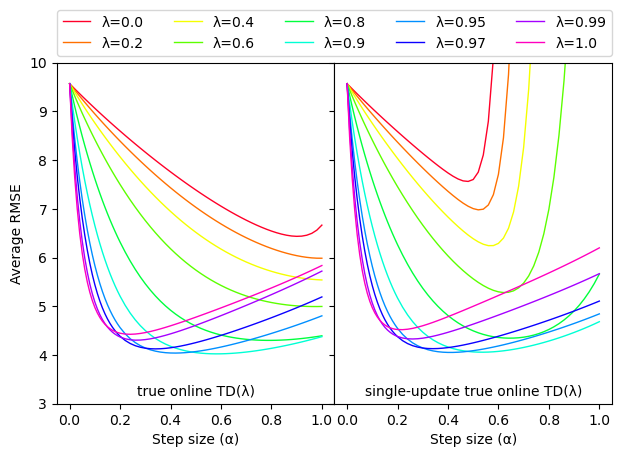

In [41]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

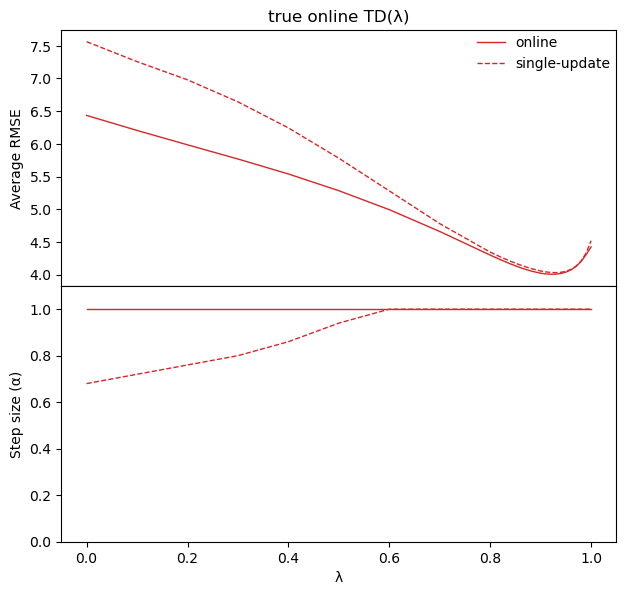

In [42]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### Comparison

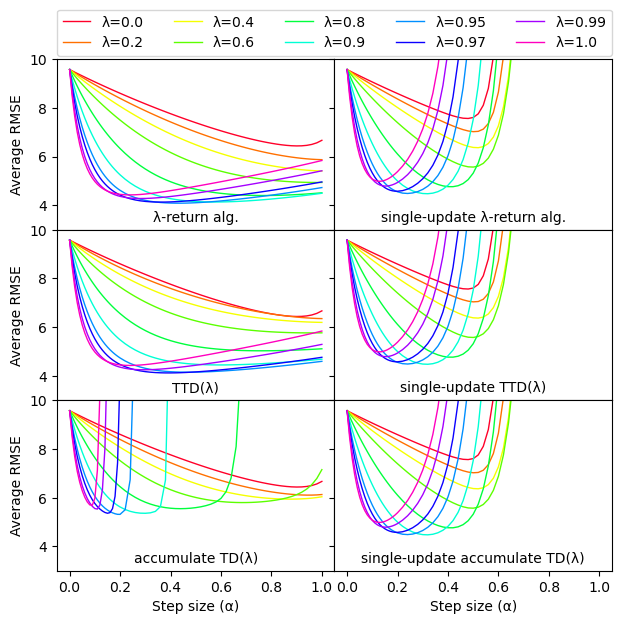

In [58]:
data_to_compare = [[('λ-return alg.', 'online'), ('λ-return alg.', 'single-update')], [('TTD(λ)', 'online'), ('TTD(λ)', 'single-update')], [('accumulate TD(λ)','online'), ('accumulate TD(λ)','single-update')]]
plot_parallel_comparison([[flt(results[a][t], operation, last, first, skip_first, lines_filter[variable]) for a,t in d] for d in data_to_compare], alpha_values, lambda_values[lines_filter[variable]], variable, [[f"{t+' ' if t=='single-update' else ''}{a}" for a,t in d] for d in data_to_compare], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top, save_file=f"results/{env_name}/plots/{env_name}_lambda")

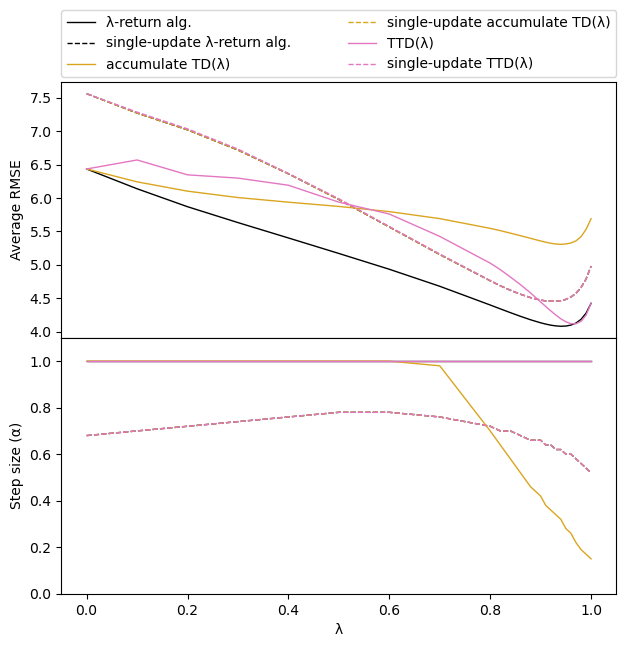

In [59]:
data_to_compare = [('λ-return alg.', 'online'), ('λ-return alg.', 'single-update'), ('accumulate TD(λ)','online'), ('accumulate TD(λ)','single-update'), ('TTD(λ)', 'online'), ('TTD(λ)', 'single-update')]
plot_best_and_div_alpha__comparison([flt(results[a][t], operation, last, first, skip_first) for a,t in data_to_compare], lambda_values, alpha_values, [f"{t+' ' if t=='single-update' else ''}{a}" for a,t in data_to_compare], None, variable, log_scale = variable=='n', set_ticks = False, ylabel="Average RMSE", colors = [(alg_colors[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], legend_kwargs=legend_top_2col, save_file=f"results/{env_name}/plots/{env_name}_lambda_c")

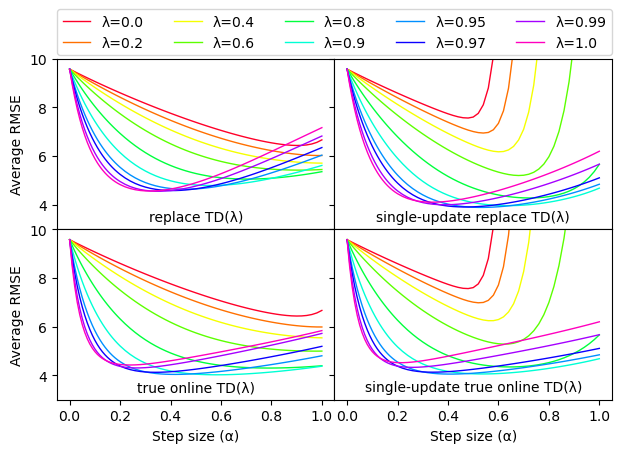

In [60]:
data_to_compare = [[('replace TD(λ)','online'), ('replace TD(λ)','single-update')], [('true online TD(λ)','online'), ('true online TD(λ)','single-update')]]
plot_parallel_comparison([[flt(results[a][t], operation, last, first, skip_first, lines_filter[variable]) for a,t in d] for d in data_to_compare], alpha_values, lambda_values[lines_filter[variable]], variable, [[f"{t+' ' if t=='single-update' else ''}{a}" for a,t in d] for d in data_to_compare], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top, save_file=f"results/{env_name}/plots/{env_name}_tdl")

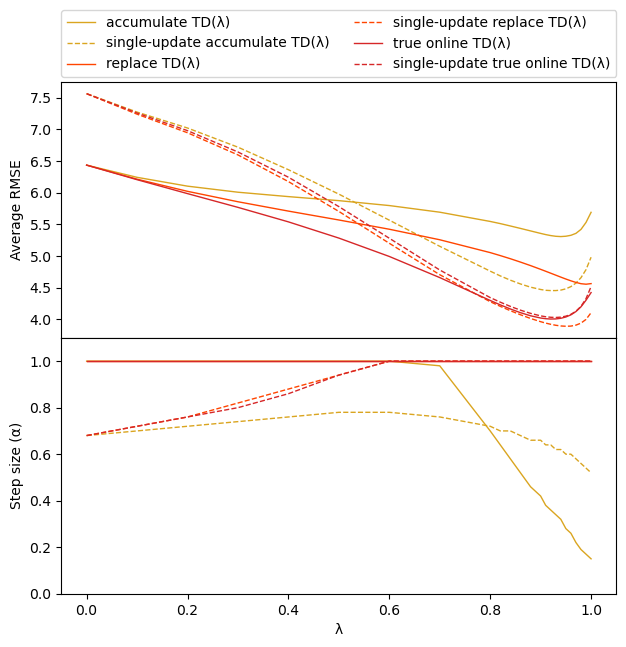

In [61]:
data_to_compare = [('accumulate TD(λ)','online'), ('accumulate TD(λ)','single-update'), ('replace TD(λ)','online'), ('replace TD(λ)','single-update'), ('true online TD(λ)','online'), ('true online TD(λ)','single-update')]
plot_best_and_div_alpha__comparison([flt(results[a][t], operation, last, first, skip_first) for a,t in data_to_compare], lambda_values, alpha_values, [f"{t+' ' if t=='single-update' else ''}{a}" for a,t in data_to_compare], None, variable, log_scale = variable=='n', set_ticks = False, ylabel="Average RMSE", colors = [(alg_colors[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], legend_kwargs=legend_top_2col, save_file=f"results/{env_name}/plots/{env_name}_tdl_c")

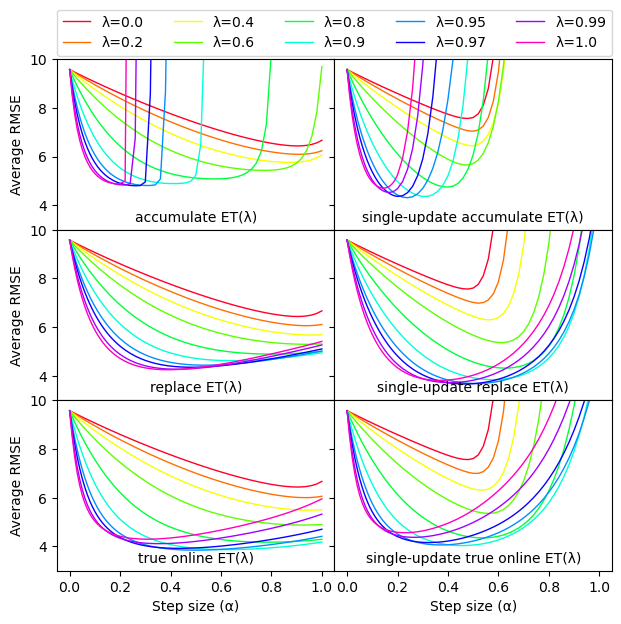

In [62]:
data_to_compare = [[('accumulate ET(λ)','online'), ('accumulate ET(λ)','single-update')], [('replace ET(λ)','online'), ('replace ET(λ)','single-update')], [('true online ET(λ)','online'), ('true online ET(λ)','single-update')]]
plot_parallel_comparison([[flt(results[a][t], operation, last, first, skip_first, lines_filter[variable]) for a,t in d] for d in data_to_compare], alpha_values, lambda_values[lines_filter[variable]], variable, [[f"{t+' ' if t=='single-update' else ''}{a}" for a,t in d] for d in data_to_compare], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)#, save_file=f"results/{env_name}/plots/{env_name}_et")

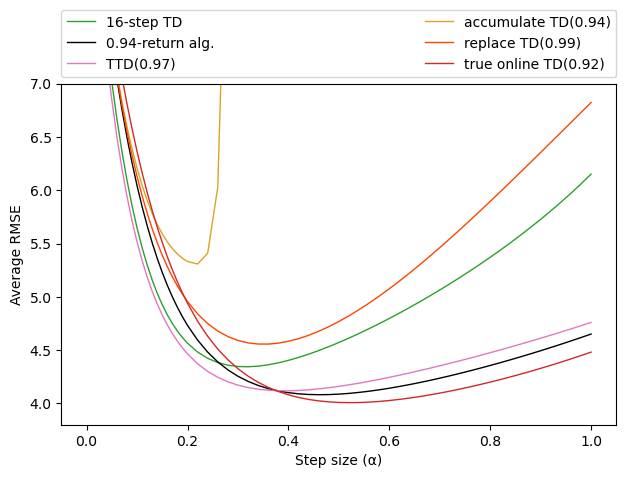

In [66]:
data_to_compare = [('n-step TD', 'online'), ('λ-return alg.', 'online'), ('TTD(λ)','online'), ('accumulate TD(λ)','online'), ('replace TD(λ)','online'), ('true online TD(λ)','online')]
plot_best_param_comparison([(lambda_values if 'λ' in a else n_values, flt(results[a][t], operation, last, first, skip_first)) for a,t in data_to_compare], alpha_values, [f"{t+' ' if t=='single-update' else ''}{a}".replace('λ', '{}').replace('n-step', '{}-step') for a,t in data_to_compare], None, colors = [(alg_colors[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], ylabel="Average RMSE", ylim=(3.8,7.0), legend_kwargs=legend_top_2col, save_file=f"results/{env_name}/plots/{env_name}_best_c")

### Control

In [69]:
algorithms_c = ['n-step SARSA', 'accumulate SARSA(λ)', 'replace SARSA(λ)', 'true online SARSA(λ)', 'accumulate SARSA-ET(λ)', 'replace SARSA-ET(λ)', 'true online SARSA-ET(λ)']
alg_colors_c = {algorithm_name: col for algorithm_name,col in zip(algorithms_c,['tab:green','goldenrod','orangered','tab:red','tab:cyan','tab:blue','tab:purple'])}
results_c = {algorithm_name: {'online': None, 'single-update': None} for algorithm_name in algorithms_c}

In [70]:
action_value_function = ActionValueFunction
to_return = 'ep_return'
runs = 200
episodes = 50
operation = 'mean'
last = None
first = 30
skip_first = False

#### Variables

In [71]:
epsilon = 0.1
max_steps = 250
initial_value = 0.0
alpha_strategy = 'fixed'
alpha_values_c = np.linspace(0.0, 1.0, 51)
beta = None
# alpha_values_c = np.append(np.linspace(0, 0.2, 20, endpoint=False),np.linspace(0.2, 1.0, 41))
n_values_c = np.array([1,2,4,8,16,32,48,64,96,128])
lambda_values_c = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1.0])
# lambda_values_c = np.array([0.0,0.2,0.4,0.6,0.7,0.74,0.8,0.84,0.9,1.0])
lines_filter = {
    'n': [True]*len(n_values_c),
    'λ': [True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True]
}
processes = None
show_progress_bar = True
bar_desc = None
leave_bar = False
ylim_c = (-29.0,-5.0)

#### n-step SARSA

In [72]:
algorithm_name = 'n-step SARSA'
algorithm_function = nstepSARSA_rec
variable = 'n'

In [73]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(n_values_c)}_{epsilon:.2f}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, n_values_c, epsilon, env_n, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [74]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(n_values_c)}_{epsilon:.2f}'
if 'simulate' in results_action:
    results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, n_values_c, epsilon, env_n, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
else:
    results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results_c[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values_c, n_values_c[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=ylim_c, legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')

In [75]:
np.max(np.mean(np.array(results_c[algorithm_name]['online'])[:,:,:31], axis = 2))

-10.312774193548398

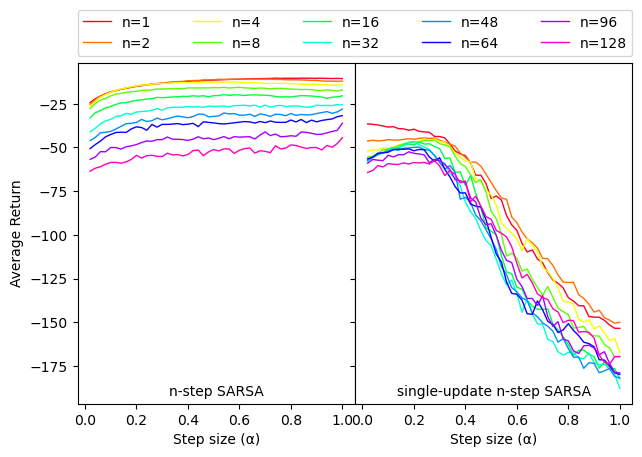

In [76]:
plot_parallel_comparison([(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable])[:,1:], flt(results_c[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable])[:,1:])], alpha_values_c[1:], n_values_c[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=None, legend_kwargs=legend_top, ylabel="Average Return", save_file=f'results/{env_name}/plots/{env_name}_c_nstep')

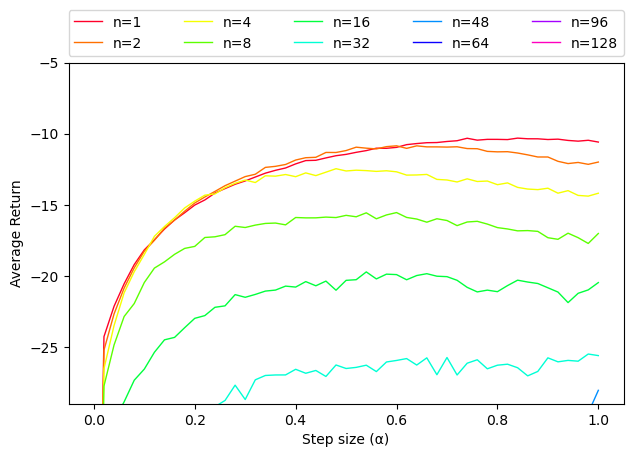

In [77]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), n_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

/notebooks/rl/plotting.py:150: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_values, np.min(rmse, axis=1) if _min else np.max(rmse, axis=1), marker, label=label, color=colors[i][0], linestyle =colors[i][1], linewidth=1.0) if colors else ax.plot(x_values, np.min(rmse, axis=1) if _min else np.max(rmse, axis=1), marker, linestyle ='solid', label=label, linewidth=1.0)


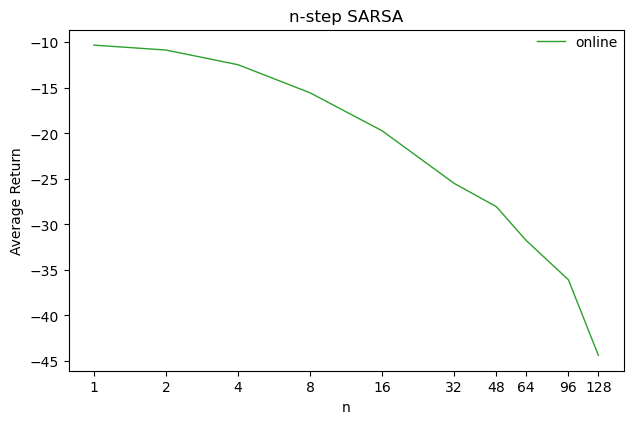

In [78]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], n_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### accumulate SARSA(λ)

In [81]:
algorithm_name = 'accumulate SARSA(λ)'
algorithm_function = SARSAλ
algorithm_type = 'accumulate'
variable = 'λ'

In [82]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values_c)}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, epsilon, env_n, algorithm_type, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [83]:
np.max(np.mean(np.array(results_c[algorithm_name]['online'])[:,:,:31], axis = 2))

-8.676387096774201

In [84]:
# single_update = True
# file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values_c)}'
# if 'simulate' in results_action:
#     results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, epsilon, env_n, algorithm_type, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
#     if 'save' in results_action:
#         save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
# else:
#     results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results_c[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values_c, lambda_values_c[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=ylim_c, legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')

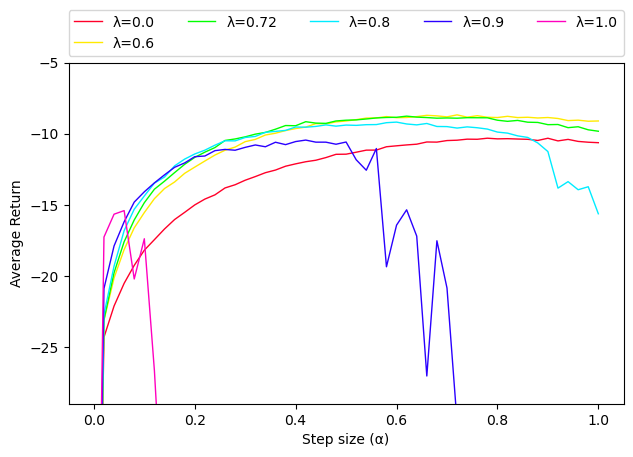

In [85]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), lambda_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

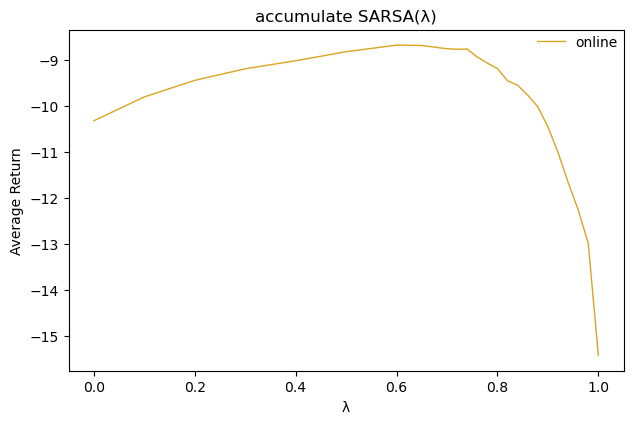

In [86]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], lambda_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### replace SARSA(λ)

In [87]:
algorithm_name = 'replace SARSA(λ)'
algorithm_function = SARSAλ
algorithm_type = 'replace'
variable = 'λ'

In [88]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values_c)}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, epsilon, env_n, algorithm_type, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [89]:
np.max(np.mean(np.array(results_c[algorithm_name]['online'])[:,:,:31], axis = 2))

-8.751306451612912

In [90]:
# single_update = True
# file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values_c)}'
# if 'simulate' in results_action:
#     results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, epsilon, env_n, algorithm_type, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
#     if 'save' in results_action:
#         save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
# else:
#     results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results_c[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values_c, lambda_values_c, variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=(-60,-10), legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')
# plot_best_alpha_comparison([results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update']], lambda_values_c, ['online','single-update'], algorithm_name, variable, _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

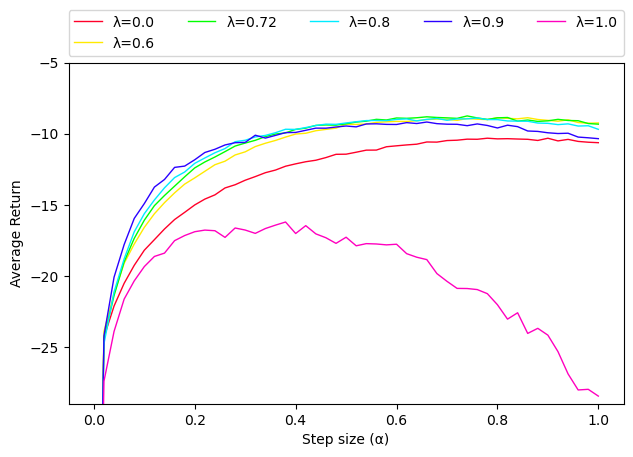

In [91]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), lambda_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

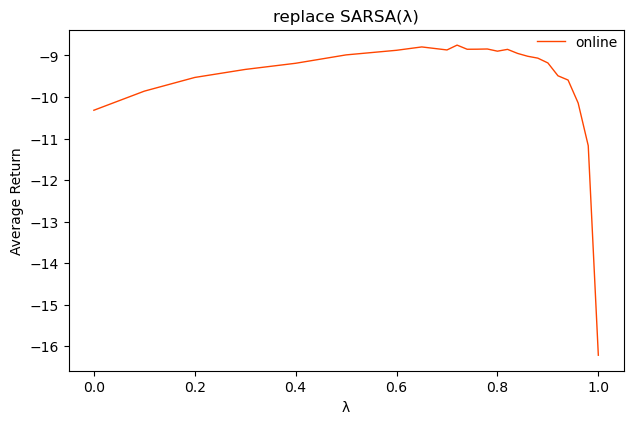

In [92]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], lambda_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### true online SARSA(λ)

In [93]:
algorithm_name = 'true online SARSA(λ)'
algorithm_function = SARSAλ
algorithm_type = 'true_online'
variable = 'λ'

In [94]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values_c)}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, epsilon, env_n, algorithm_type, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [95]:
np.max(np.mean(np.array(results_c[algorithm_name]['online'])[:,:,:31], axis = 2))

-8.614500000000007

In [96]:
# single_update = True
# file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values_c)}'
# if 'simulate' in results_action:
#     results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, epsilon, env_n, algorithm_type, gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
#     if 'save' in results_action:
#         save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
# else:
#     results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update'])], alpha_values_c, lambda_values_c, variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=(-60,-10), legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')
# plot_best_alpha_comparison([results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update']], lambda_values_c, ['online','single-update'], algorithm_name, variable, _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

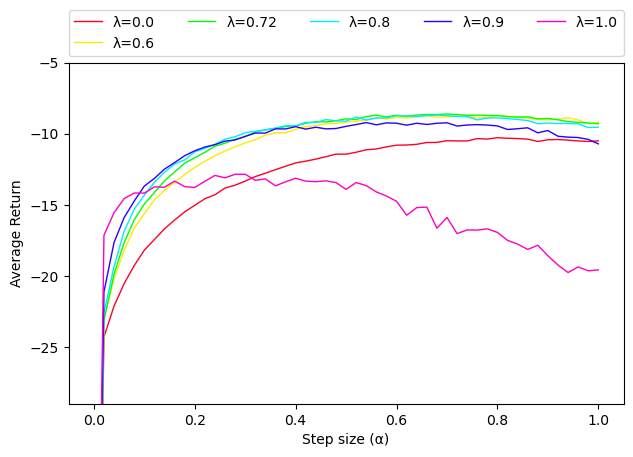

In [97]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), lambda_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

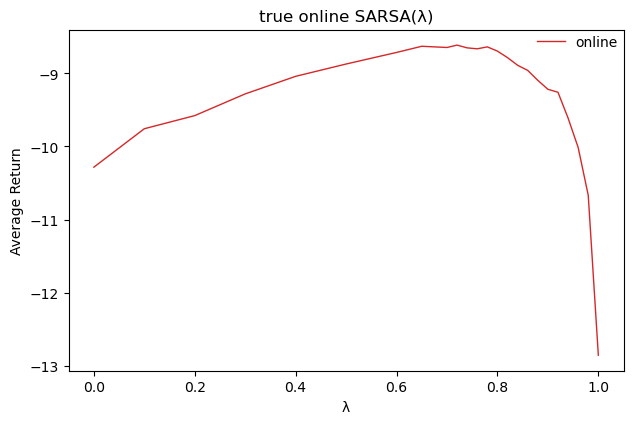

In [98]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], lambda_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### Comparison

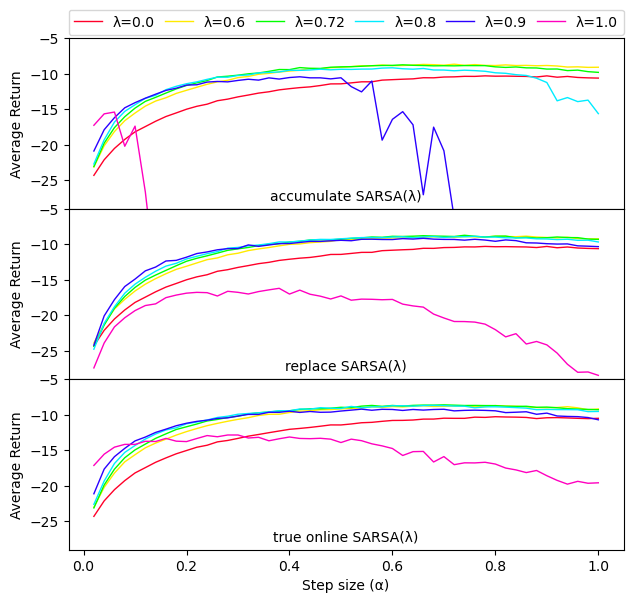

In [64]:
data_to_compare = [[('accumulate SARSA(λ)','online')], [('replace SARSA(λ)','online')], [('true online SARSA(λ)','online')]]
plot_parallel_comparison([[flt(results_c[a][t], operation, last, first, skip_first, lines_filter['λ'])[:,1:] for a,t in d] for d in data_to_compare], alpha_values_c[1:], lambda_values_c[lines_filter['λ']], variable, [[f"{t+' ' if t=='single-update' else ''}{a}" for a,t in d] for d in data_to_compare], ylabel="Average Return", ylim=ylim_c, legend_kwargs=legend_top_6col, save_file=f"results/{env_name}/plots/{env_name}_c_sarsa")

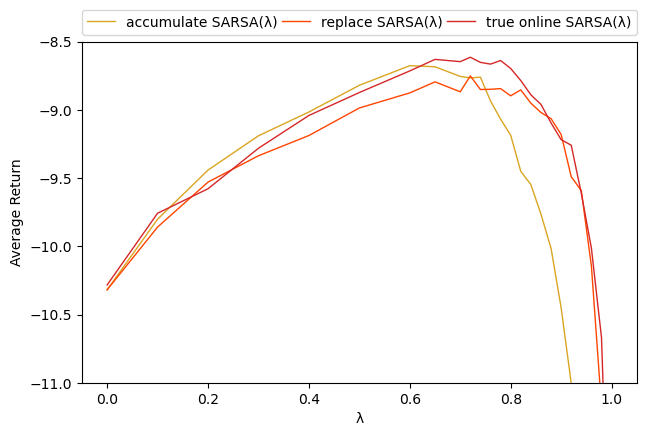

In [65]:
data_to_compare = [('accumulate SARSA(λ)','online'), ('replace SARSA(λ)','online'), ('true online SARSA(λ)','online')]#, ('accumulate SARSA-ET(λ)','online'), ('replace SARSA-ET(λ)','online'), ('true online SARSA-ET(λ)','online')]
legend_top_ = {'bbox_to_anchor': (0., 1.02, 1., .102), 'loc': 'lower left', 'ncol': 3, 'mode':'expand', 'borderaxespad': 0.}
plot_best_alpha_comparison([flt(results_c[a][t], operation, last, first, skip_first) for a,t in data_to_compare], lambda_values_c, [f"{t+' ' if t=='single-update' else ''}{a}" for a,t in data_to_compare], None, variable, ylabel='Average Return', ylim=(-11,-8.5), _min = False, colors = [(alg_colors_c[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_top_3col, save_file=f"results/{env_name}/plots/{env_name}_c_sarsa_c")

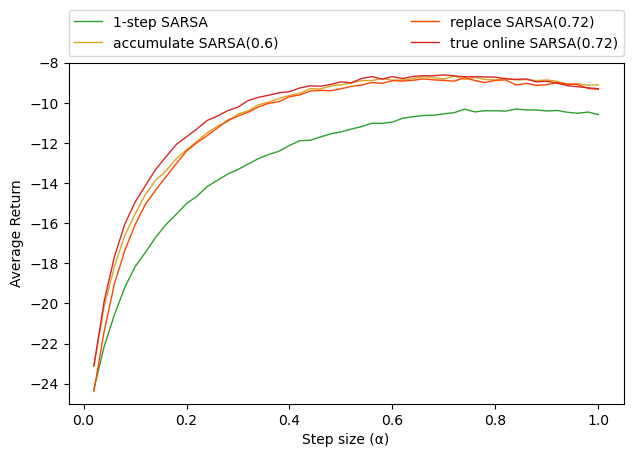

In [66]:
data_to_compare = [('n-step SARSA', 'online'), ('accumulate SARSA(λ)','online'), ('replace SARSA(λ)','online'), ('true online SARSA(λ)','online')]#, ('accumulate SARSA-ET(λ)','online'), ('replace SARSA-ET(λ)','online'), ('true online SARSA-ET(λ)','online')]
plot_best_param_comparison([(lambda_values_c if 'λ' in a else n_values_c, flt(results_c[a][t], operation, last, first, skip_first)[:,1:]) for a,t in data_to_compare], alpha_values_c[1:], [f"{t+' ' if t=='single-update' else ''}{a}".replace('λ', '{}').replace('n-step', '{}-step') for a,t in data_to_compare], None, _min=False, colors = [(alg_colors_c[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], ylabel="Average Return", ylim=(-25,-8), legend_kwargs=legend_top_2col, save_file=f"results/{env_name}/plots/{env_name}_c_c_best")

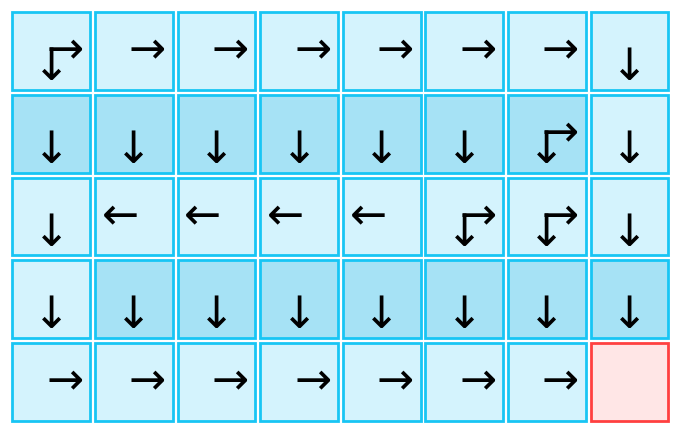

In [14]:
plot_grid_world_optimal_policy(action_value_function(environment(env_n)), save_file=f"results/{env_name}/plots/{env_name}_optimal")

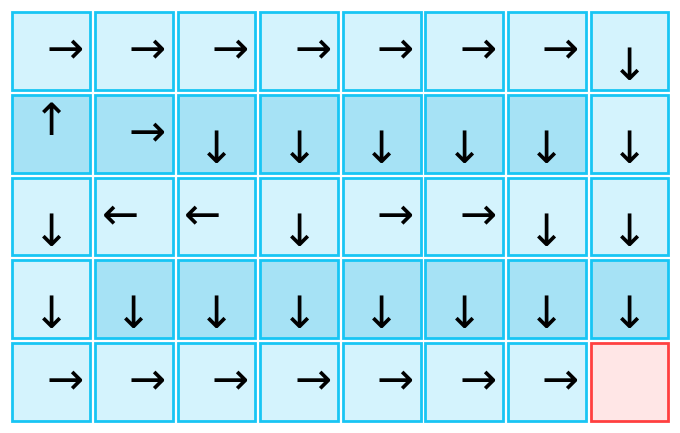

In [99]:
avf = SARSAλ(0.72, 0.6, 30, environment, epsilon, env_n, 'true_online', gamma, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, False, 'action_value_function', seed)
plot_grid_world_with_policy(avf, save_file=f"results/{env_name}/plots/{env_name}_sample")

### Experiments

#### accumulate ET(λ)

In [43]:
algorithm_name = 'accumulate ET(λ)'
algorithm_function = ETλ
algorithm_type = 'accumulate'
variable = 'λ'

In [44]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}_{beta}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, beta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [45]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}_{beta}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, beta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

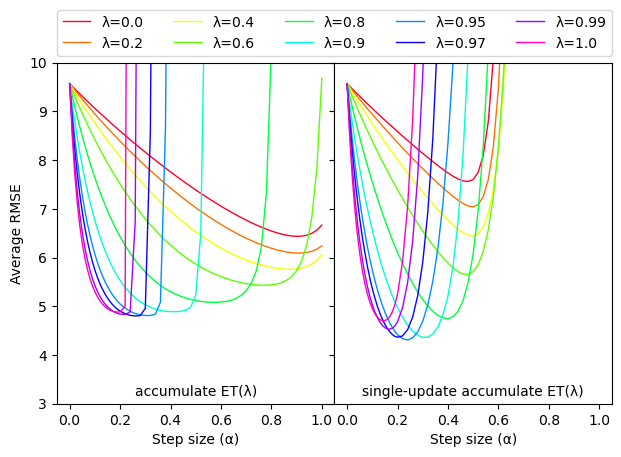

In [46]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

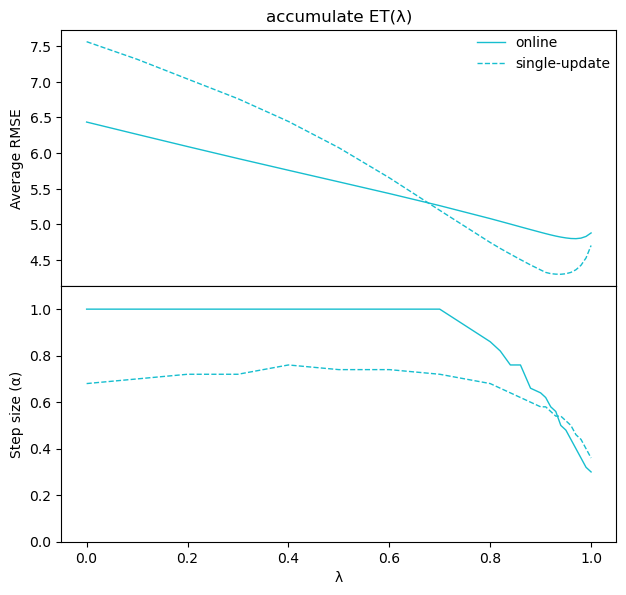

In [47]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### replace ET(λ)

In [48]:
algorithm_name = 'replace ET(λ)'
algorithm_function = ETλ
algorithm_type = 'replace'
variable = 'λ'

In [49]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}_{beta}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, beta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [50]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}_{beta}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, beta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

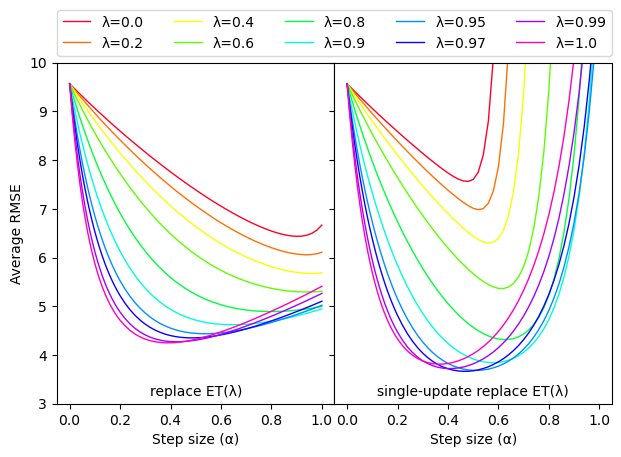

In [51]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

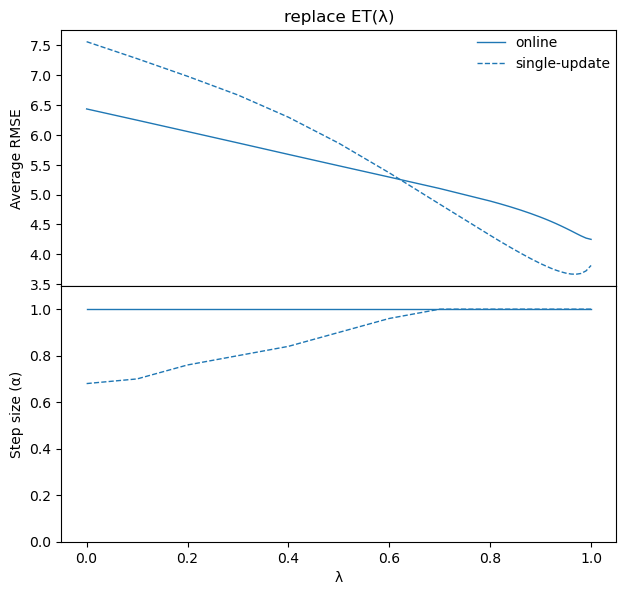

In [52]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### true online ET(λ)

In [53]:
algorithm_name = 'true online ET(λ)'
algorithm_function = ETλ
algorithm_type = 'true_online'
variable = 'λ'

In [54]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values)}_{beta}'
if 'simulate' in results_action:
    results[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, beta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['online'])
else:
    results[algorithm_name]['online'] = load_results(results_path, file_name)

In [55]:
single_update = True
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values)}_{beta}'
if 'simulate' in results_action:
    results[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values, lambda_values, env_n, algorithm_type, beta, gamma, value_function, initial_value, aggr_groups, alpha_strategy, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_path, file_name, results[algorithm_name]['single-update'])
else:
    results[algorithm_name]['single-update'] = load_results(results_path, file_name)

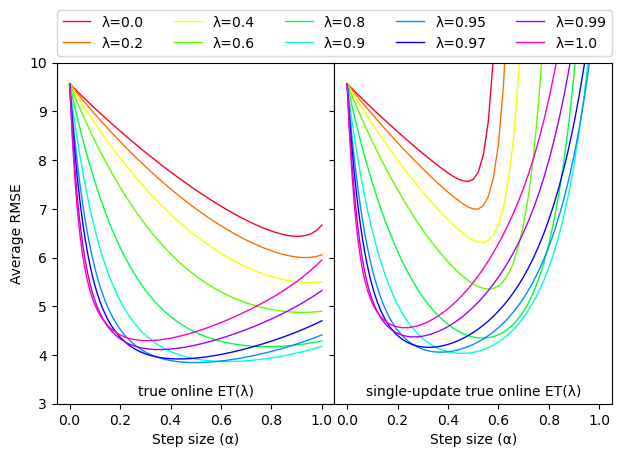

In [56]:
plot_parallel_comparison([(flt(results[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first, lines_filter[variable]))], alpha_values, lambda_values[lines_filter[variable]], variable, [(algorithm_name, f'single-update {algorithm_name}')], ylabel="Average RMSE", ylim=ylim, legend_kwargs=legend_top)

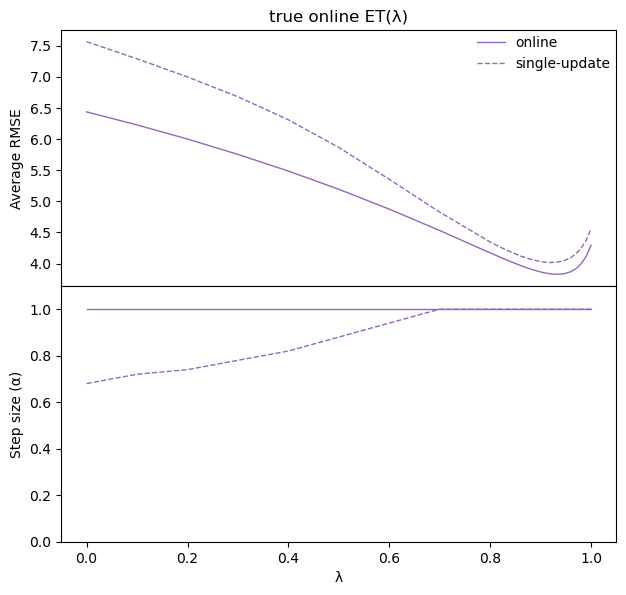

In [57]:
plot_best_and_div_alpha__comparison([flt(results[algorithm_name]['online'], operation, last, first, skip_first), flt(results[algorithm_name]['single-update'], operation, last, first, skip_first)], lambda_values, alpha_values, ['online','single-update'], algorithm_name, variable, ylabel="Average RMSE", colors = [(alg_colors[algorithm_name],'solid'),(alg_colors[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=False, legend_kwargs=legend_best)

#### Comparison

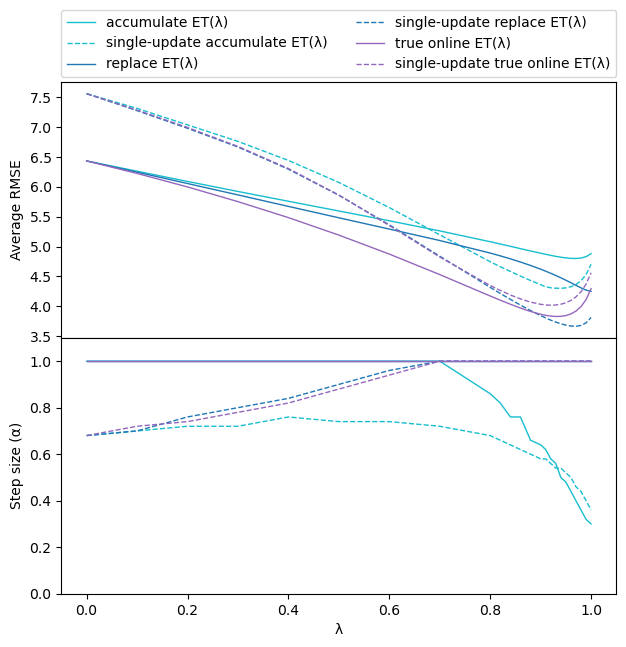

In [63]:
data_to_compare = [('accumulate ET(λ)','online'), ('accumulate ET(λ)','single-update'), ('replace ET(λ)','online'), ('replace ET(λ)','single-update'), ('true online ET(λ)','online'), ('true online ET(λ)','single-update')]
plot_best_and_div_alpha__comparison([flt(results[a][t], operation, last, first, skip_first) for a,t in data_to_compare], lambda_values, alpha_values, [f"{t+' ' if t=='single-update' else ''}{a}" for a,t in data_to_compare], None, variable, ylabel="Average RMSE", log_scale = variable=='n', set_ticks = False, colors = [(alg_colors[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], legend_kwargs=legend_top_2col)

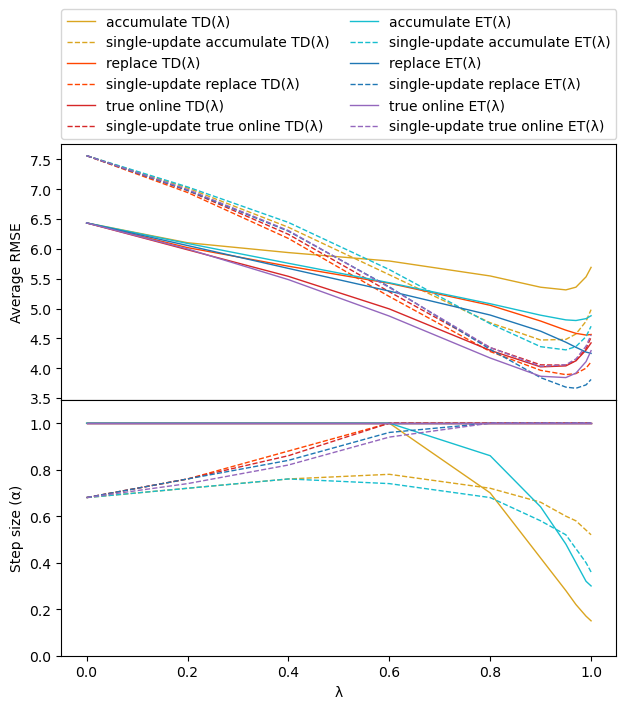

In [64]:
data_to_compare = [('accumulate TD(λ)','online'), ('accumulate TD(λ)','single-update'), ('replace TD(λ)','online'), ('replace TD(λ)','single-update'), ('true online TD(λ)','online'), ('true online TD(λ)','single-update'), ('accumulate ET(λ)','online'), ('accumulate ET(λ)','single-update'), ('replace ET(λ)','online'), ('replace ET(λ)','single-update'), ('true online ET(λ)','online'), ('true online ET(λ)','single-update')]
plot_best_and_div_alpha__comparison([flt(results[a][t], operation, last, first, skip_first, lines_filter[variable]) for a,t in data_to_compare], lambda_values[lines_filter[variable]], alpha_values, [f"{t+' ' if t=='single-update' else ''}{a}" for a,t in data_to_compare], None, variable, ylabel="Average RMSE", log_scale = variable=='n', set_ticks = False, colors = [(alg_colors[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], legend_kwargs=legend_top_2col)

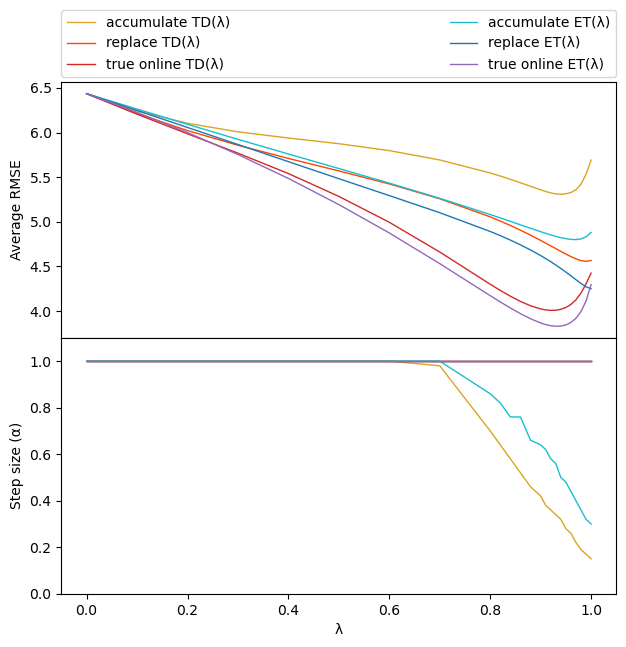

In [65]:
data_to_compare = [('accumulate TD(λ)','online'), ('replace TD(λ)','online'), ('true online TD(λ)','online'), ('accumulate ET(λ)','online'), ('replace ET(λ)','online'), ('true online ET(λ)','online')]
plot_best_and_div_alpha__comparison([flt(results[a][t], operation, last, first, skip_first) for a,t in data_to_compare], lambda_values, alpha_values, [f"{t+' ' if t=='single-update' else ''}{a}" for a,t in data_to_compare], None, variable, ylabel="Average RMSE", log_scale = variable=='n', set_ticks = False, colors = [(alg_colors[a],'dashed' if t=='single-update' else 'solid') for a,t in data_to_compare], legend_kwargs=legend_top_2col)

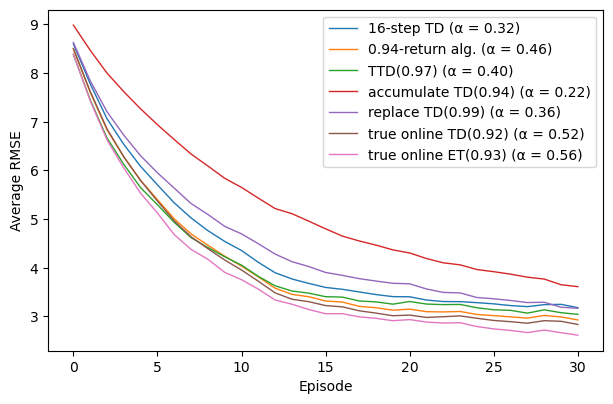

In [67]:
data_to_compare = [('n-step TD', 'online'), ('λ-return alg.', 'online'), ('TTD(λ)','online'), ('accumulate TD(λ)','online'), ('replace TD(λ)','online'), ('true online TD(λ)','online'), ('true online ET(λ)','online')]
plot_best_comparison(results, data_to_compare, alpha_values, lambda_values, n_values, operation, last, first, skip_first)

#### accumulate SARSA-ET(λ)

In [100]:
algorithm_name = 'accumulate SARSA-ET(λ)'
algorithm_function = SARSA_ETλ
algorithm_type = 'accumulate'
variable = 'λ'

In [ ]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values_c)}_{beta}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, env_n, algorithm_type, beta, gamma, epsilon, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [ ]:
# single_update = True
# file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values_c)}'
# if 'simulate' in results_action:
#     results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, env_n, algorithm_type, beta, gamma, epsilon, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
#     if 'save' in results_action:
#         save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
# else:
#     results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update'])], alpha_values_c, lambda_values_c, variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=(-20,-10), legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')
# plot_best_alpha_comparison([results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update']], lambda_values_c, ['online','single-update'], algorithm_name, variable, _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

In [ ]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), lambda_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

In [ ]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], lambda_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### replace SARSA-ET(λ)

In [ ]:
algorithm_name = 'replace SARSA-ET(λ)'
algorithm_function = SARSA_ETλ
algorithm_type = 'replace'
variable = 'λ'

In [ ]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values_c)}_{beta}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, env_n, algorithm_type, beta, gamma, epsilon, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [ ]:
# single_update = True
# file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values_c)}'
# if 'simulate' in results_action:
#     results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, env_n, algorithm_type, beta, gamma, epsilon, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
#     if 'save' in results_action:
#         save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
# else:
#     results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update'])], alpha_values_c, lambda_values_c, variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=(-20,-10), legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')
# plot_best_alpha_comparison([results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update']], lambda_values_c, ['online','single-update'], algorithm_name, variable, _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

In [ ]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), lambda_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

In [ ]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], lambda_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### true online SARSA-ET(λ)

In [ ]:
algorithm_name = 'true online SARSA-ET(λ)'
algorithm_function = SARSA_ETλ
algorithm_type = 'true_online'
variable = 'λ'
beta = None

In [ ]:
single_update = False
file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_online_{len(lambda_values_c)}_{beta}'
if 'simulate' in results_action:
    results_c[algorithm_name]['online'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, env_n, algorithm_type, beta, gamma, epsilon, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
    if 'save' in results_action:
        save_results(results_c_path, file_name, results_c[algorithm_name]['online'])
else:
    results_c[algorithm_name]['online'] = load_results(results_c_path, file_name)

In [ ]:
# single_update = True
# file_name = f'{episodes}_{runs}_{env_n}_{aggr_groups if aggr_groups else 0}_{algorithm_name}_single-update_{len(lambda_values_c)}'
# if 'simulate' in results_action:
#     results_c[algorithm_name]['single-update'] = comparison(environment, algorithm_function, runs, episodes, alpha_values_c, lambda_values_c, env_n, algorithm_type, beta, gamma, epsilon, action_value_function, initial_value, aggr_groups, alpha_strategy, max_steps, single_update, to_return, seed=seed, processes=processes, show_progress_bar=show_progress_bar, bar_desc=bar_desc, leave_bar=leave_bar)
#     if 'save' in results_action:
#         save_results(results_c_path, file_name, results_c[algorithm_name]['single-update'])
# else:
#     results_c[algorithm_name]['single-update'] = load_results(results_c_path, file_name)
# plot_parallel_comparison([(results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update'])], alpha_values_c, lambda_values_c, variable, [(algorithm_name, f'single-update {algorithm_name}')], ylim=(-20,-10), legend_kwargs=legend_top, ylabel="Average RMSE", save_file=f'results/{env_name}/plots/{env_name}_nstep')
# plot_best_alpha_comparison([results_c[algorithm_name]['online'], results_c[algorithm_name]['single-update']], lambda_values_c, ['online','single-update'], algorithm_name, variable, _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

In [ ]:
plot_comparison(flt(results_c[algorithm_name]['online'], operation, last, first, skip_first, lines_filter[variable]), lambda_values_c[lines_filter[variable]], alpha_values_c, variable, ylabel='Average Return', ylim=ylim_c, legend_kwargs=legend_top1, save_file=None)

In [ ]:
plot_best_alpha_comparison([flt(results_c[algorithm_name]['online'], operation, last, first, skip_first)], lambda_values_c, ['online'], algorithm_name, variable, ylabel="Average Return", _min = False, colors = [(alg_colors_c[algorithm_name],'solid'),(alg_colors_c[algorithm_name],'dashed')], log_scale = variable=='n', set_ticks=variable=='n', legend_kwargs=legend_best)

#### Comparison